<a href="https://colab.research.google.com/github/DGuilherme/TurbofanVibration/blob/master/MachineryFaultDatabase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise do Data Set 

*Imports needed*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# for the FFT transformation
from scipy import pi
from scipy.fftpack import fft

# Analisys
import dataset

In [5]:
url = 'https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv'
train_data = pd.read_csv(url,delimiter=r",")
# Dataset is now stored in a Pandas Dataframe
print(train_data)

       machineID    datetime  time_in_cycles  ...  failed   RUL  RUL_I
0              1  2015-01-06               2  ...       0   1.0   59.0
1              1  2015-01-07               3  ...       0   2.0   58.0
2              1  2015-01-08               4  ...       0   3.0   57.0
3              1  2015-01-09               5  ...       0   4.0   56.0
4              1  2015-01-10               6  ...       0   5.0   55.0
...          ...         ...             ...  ...     ...   ...    ...
20862        100  2015-12-05             335  ...       0  86.0    4.0
20863        100  2015-12-06             336  ...       0  87.0    3.0
20864        100  2015-12-07             337  ...       0  88.0    2.0
20865        100  2015-12-08             338  ...       0  89.0    1.0
20866        100  2015-12-09             339  ...       1  90.0    0.0

[20867 rows x 36 columns]


In [6]:
train_data.describe()

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,age,DI,RULWeek,failed,RUL,RUL_I
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,50.298701,165.113193,170.764300,446.904028,100.835121,40.366868,14.891455,49.981589,10.051741,5.005667,170.757148,446.953187,100.814391,40.368813,3.597851,12.704232,2.831775,1.337652,0.028274,0.026501,0.022524,0.018834,0.009345,0.979968,1.005847,0.902957,0.973020,11.276609,1.355362,6.297216,0.017156,40.993530,39.993530
std,28.498588,96.234465,4.705465,17.568211,4.686904,2.009087,2.256266,7.656798,1.711783,0.798050,2.651086,10.246894,2.875922,1.218236,2.358522,9.535629,2.924682,1.193674,0.168341,0.162699,0.150308,0.136994,0.096219,9.412620,8.866971,8.594574,8.968442,5.908401,0.684584,5.758597,0.129857,40.327123,40.327123
min,1.000000,1.000000,157.745683,271.246607,91.406112,36.163723,7.725686,25.209287,4.513850,2.433576,164.258868,367.083007,96.257601,38.266496,0.145179,0.742933,0.147009,0.073920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,25.000000,81.000000,168.064755,441.611873,98.675682,39.368911,13.311910,44.742217,8.915912,4.467978,169.230132,445.329262,99.447499,39.743089,2.236074,7.506991,1.465612,0.734110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.793072,3.000000,0.000000,15.000000,14.000000
50%,50.000000,159.000000,170.192013,449.256587,100.109686,40.068515,14.829787,49.607115,9.920496,4.963451,170.233189,449.270779,100.111673,40.075541,3.002149,10.040921,1.971123,0.990414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.317122,5.000000,0.000000,30.000000,29.000000
75%,75.000000,248.000000,172.479530,456.382523,101.591905,40.824797,16.407464,54.896123,10.995514,5.488903,171.380739,452.608592,100.870673,40.465523,3.930957,13.209783,2.599381,1.317505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.904424,8.000000,0.000000,53.000000,52.000000
max,100.000000,363.000000,218.265191,493.381312,152.314600,61.113082,26.725027,101.437628,21.138799,9.743413,193.359322,467.251296,125.078212,52.143560,22.722184,90.129985,26.565238,10.310603,2.000000,2.000000,2.000000,2.000000,1.000000,270.000000,270.000000,270.000000,270.000000,20.000000,2.701757,39.000000,1.000000,270.000000,269.000000


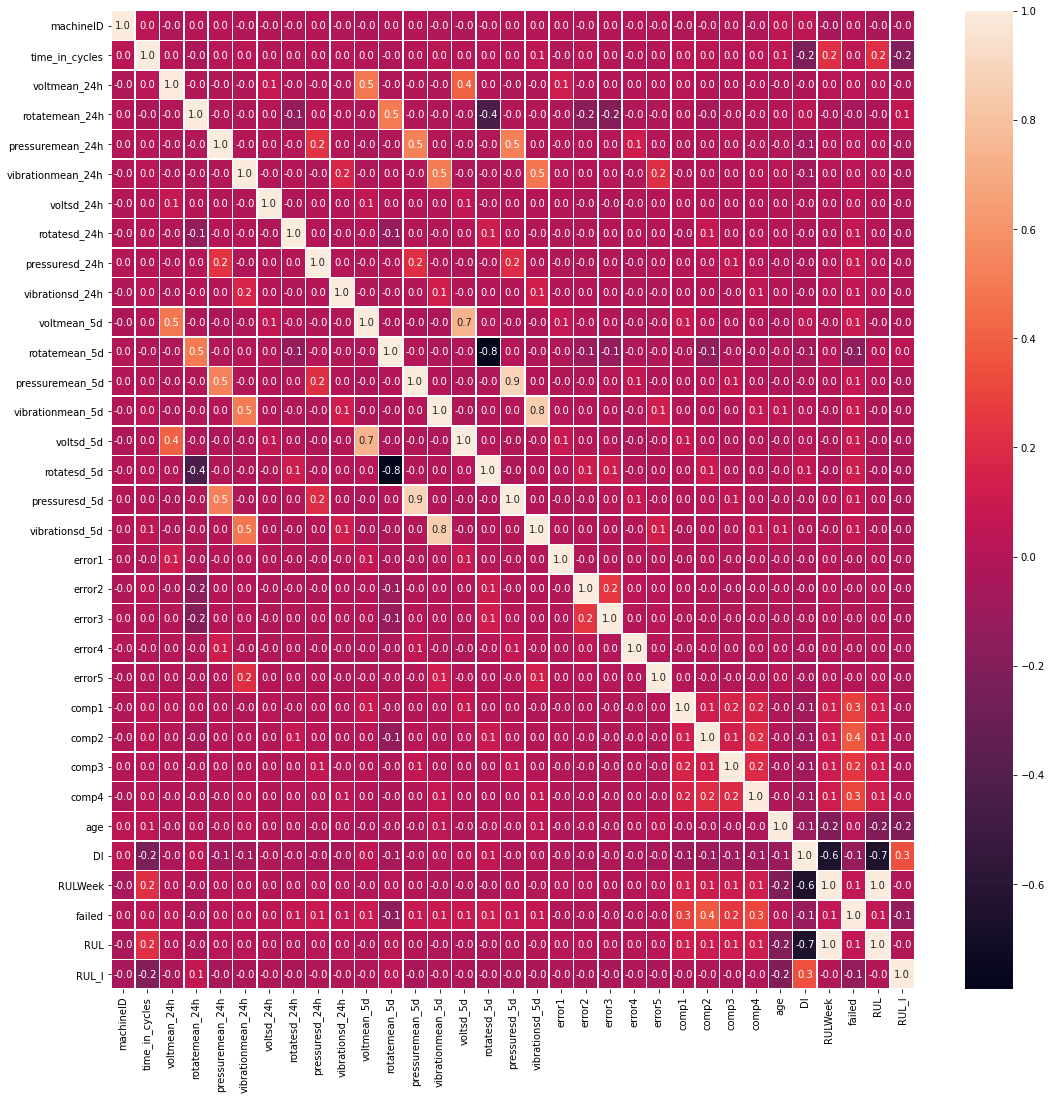

In [7]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [8]:
date_time_df = train_data['DI']
print(date_time_df)

0        2.663840
1        2.610489
2        2.558206
3        2.506971
4        2.456761
           ...   
20862    1.269900
20863    1.258711
20864    1.247621
20865    1.236629
20866    1.225734
Name: DI, Length: 20867, dtype: float64


In [9]:
#scikit-learn functions expect as input a numpy array X with dimension [samples, features/variables] .
#train_data['datetime'] = pd.date_range('2000', periods=2)
np_train_data = train_data.to_numpy()
print(np_train_data)

[[1 '2015-01-06' 2 ... 0 1.0 59.0]
 [1 '2015-01-07' 3 ... 0 2.0 58.0]
 [1 '2015-01-08' 4 ... 0 3.0 57.0]
 ...
 [100 '2015-12-07' 337 ... 0 88.0 2.0]
 [100 '2015-12-08' 338 ... 0 89.0 1.0]
 [100 '2015-12-09' 339 ... 1 90.0 0.0]]


In [10]:
# build the scaler model
scaler = MinMaxScaler()

# fit using the train set
scaler.fit(np_train_data)

NameError: ignored